In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
# Importing various modules for data visualisation and manipulation
import numpy as np
import pandas as pd 
from csv import reader
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from matplotlib import style
import seaborn as sns
import glob
import collections
import networkx as nx
import random



## 2. Data Understanding



In [4]:
result = pd.read_csv('./data/train_format1.csv')
result.head()
#'user_id', 'merchant_id', 'label'

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [5]:
result.shape

(260864, 3)

In [6]:
set(result.label)

{0, 1}

In [7]:
result['id'] = result['user_id'].map(str) + '_'  + result['merchant_id'].map(str)
result

,user_id,merchant_id,label,id
0,34176,3906,0,34176_3906
1,34176,121,0,34176_121
2,34176,4356,1,34176_4356
3,34176,2217,0,34176_2217
4,230784,4818,0,230784_4818
...,...,...,...,...
260859,359807,4325,0,359807_4325
260860,294527,3971,0,294527_3971
260861,294527,152,0,294527_152
260862,294527,2537,0,294527_2537


In [8]:
len(set(result['id']))

260864

In [9]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      260864 non-null  int64 
 1   merchant_id  260864 non-null  int64 
 2   label        260864 non-null  int64 
 3   id           260864 non-null  object
dtypes: int64(3), object(1)
memory usage: 8.0+ MB


In [10]:
# the missing value proportion of each columns in this table.
result.isnull().sum()/result.shape[0]

user_id        0.0
merchant_id    0.0
label          0.0
id             0.0
dtype: float64

Label Distribution： 
 label
0    244912
1     15952
Name: user_id, dtype: int64


<AxesSubplot:ylabel='label'>

<AxesSubplot:xlabel='label', ylabel='count'>

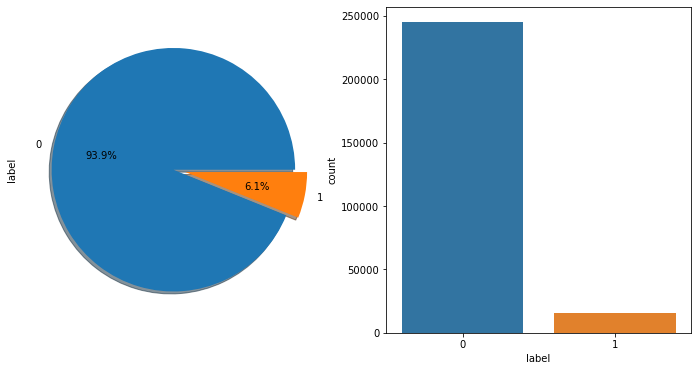

In [11]:
label_gp = result.groupby('label')['user_id'].count()
print('Label Distribution： \n',label_gp)
_,axe = plt.subplots(1,2,figsize=(12,6))
result.label.value_counts().plot(kind='pie',autopct='%1.1f%%',shadow = True,explode = [0,0.1],ax= axe[0])
sns.countplot('label',data=result,ax=axe[1],)

## User Log

In [12]:
#load user log information
user_behaviour = pd.read_csv('./data/user_log_format1.csv') #cover the content of user_info_format1 
user_behaviour.head()
#contains users both in train set and test set
# ['user_id', 'item_id', 'cat_id', 'seller_id', 'brand_id', 'time_stamp','action_type']

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


In [13]:
user_behaviour.shape

(54925330, 7)

In [14]:
user_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


In [15]:
#rename the seller_id to stay same 'primary key' with other tables.
user_behaviour.rename(columns = {'seller_id':'merchant_id'},inplace = True)
user_behaviour['id'] = user_behaviour['user_id'].map(str)+'_'+ user_behaviour['merchant_id'].map(str)
#split the shopping month and date from the time_stamp column
user_behaviour['month'] = user_behaviour['time_stamp'].apply(lambda x: int(str(x)[:-2]))
user_behaviour['date'] = user_behaviour['time_stamp'].apply(lambda x: int(str(x)[-2:]))

In [16]:
user_behaviour.head()

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,id,month,date
0,328862,323294,833,2882,2661.0,829,0,328862_2882,8,29
1,328862,844400,1271,2882,2661.0,829,0,328862_2882,8,29
2,328862,575153,1271,2882,2661.0,829,0,328862_2882,8,29
3,328862,996875,1271,2882,2661.0,829,0,328862_2882,8,29
4,328862,1086186,1271,1253,1049.0,829,0,328862_1253,8,29


In [17]:
m = user_behaviour.groupby('item_id').cat_id.nunique()
set(m.values)

{1, 2, 3, 4, 5, 6}

In [18]:
m[m.values !=1]

item_id
37         2
144        2
350        2
621        2
1135       2
          ..
1111983    2
1112237    2
1112501    2
1112670    3
1113055    2
Name: cat_id, Length: 6645, dtype: int64

In [19]:
user_behaviour[user_behaviour['item_id'] == 126963]

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,id,month,date
11625886,48522,126963,490,1000,NaN,1111,2,48522_1000,11,11
20222755,64064,126963,1074,1000,NaN,1111,2,64064_1000,11,11
23265613,155507,126963,666,1000,NaN,1111,2,155507_1000,11,11
28974134,359447,126963,666,1000,NaN,1111,2,359447_1000,11,11
33075882,341238,126963,1113,1000,NaN,529,2,341238_1000,5,29
33075885,341238,126963,138,1000,NaN,529,2,341238_1000,5,29
45997184,391952,126963,1205,1000,NaN,1111,2,391952_1000,11,11


In [20]:
# the missing value proportion of each columns in this table.
miss_ub = user_behaviour.isnull().sum()/user_behaviour.shape[0]
miss_ub

user_id        0.000000
item_id        0.000000
cat_id         0.000000
merchant_id    0.000000
brand_id       0.001657
time_stamp     0.000000
action_type    0.000000
id             0.000000
month          0.000000
date           0.000000
dtype: float64

## User information

In [21]:
user = pd.read_csv('./data/user_info_format1.csv')
user.head()

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [22]:
user.loc[[0,1,3],'user_id']

0    376517
1    234512
3    186135
Name: user_id, dtype: int64

In [23]:
user.isnull().sum()

user_id         0
age_range    2217
gender       6436
dtype: int64

In [24]:
user.shape

(424170, 3)

In [25]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


## User-Merchant Information

In [26]:
all_user = pd.read_csv('./data/train_format2.csv')
# user = all_user[train_user['label'] != -1]
all_user.head()
# ['user_id', 'age_range', 'gender', 'merchant_id', 'label','activity_log']

,user_id,age_range,gender,merchant_id,label,activity_log
0,34176,6.0,0.0,944,-1,408895:1505:7370:1107:0
1,34176,6.0,0.0,412,-1,17235:1604:4396:0818:0#954723:1604:4396:0818:0...
2,34176,6.0,0.0,1945,-1,231901:662:2758:0818:0#231901:662:2758:0818:0#...
3,34176,6.0,0.0,4752,-1,174142:821:6938:1027:0
4,34176,6.0,0.0,643,-1,716371:1505:968:1024:3


In [27]:
all_user.shape

(7030723, 6)

In [28]:
all_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7030723 entries, 0 to 7030722
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user_id       int64  
 1   age_range     float64
 2   gender        float64
 3   merchant_id   int64  
 4   label         int64  
 5   activity_log  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 321.8+ MB


In [29]:
all_user['log_num'] = all_user['activity_log'].apply(lambda x:str(x).count('#'))


In [30]:
all_user['num'] = all_user.apply(lambda x: x.log_num if ((x.log_num ==0) & (str(x.activity_log).count(':')==0)) else x.log_num+1, axis = 1)
all_user

,user_id,age_range,gender,merchant_id,label,activity_log,log_num,num
0,34176,6.0,0.0,944,-1,408895:1505:7370:1107:0,0,1
1,34176,6.0,0.0,412,-1,17235:1604:4396:0818:0#954723:1604:4396:0818:0...,7,8
2,34176,6.0,0.0,1945,-1,231901:662:2758:0818:0#231901:662:2758:0818:0#...,6,7
3,34176,6.0,0.0,4752,-1,174142:821:6938:1027:0,0,1
4,34176,6.0,0.0,643,-1,716371:1505:968:1024:3,0,1
...,...,...,...,...,...,...,...,...
7030718,229247,4.0,2.0,2000,-1,610483:737:3894:0516:2#610483:737:3894:0524:0,1,2
7030719,229247,4.0,2.0,579,-1,179514:420:3610:1014:0#1007071:420:3610:1014:0...,2,3
7030720,229247,4.0,2.0,1860,-1,980351:1130:918:1016:3#153613:1130:918:1016:0#...,2,3
7030721,229247,4.0,2.0,4140,0,308321:737:5697:1111:0#308321:737:5697:1111:0#...,23,24


In [31]:
all_user.to_csv('user1.csv')

In [32]:
m = all_user.groupby(['user_id','merchant_id']).activity_log.count()
set(m.values)

{0, 1}

In [33]:
# the missing value proportion of each columns in this table.
all_user.isnull().sum()/all_user.shape[0]

user_id         0.000000
age_range       0.002756
gender          0.008777
merchant_id     0.000000
label           0.000000
activity_log    0.000423
log_num         0.000000
num             0.000000
dtype: float64

## Data Merge

In [34]:
df = pd.merge(user_behaviour,user,on = 'user_id',how = 'left')
df

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,id,month,date,age_range,gender
0,328862,323294,833,2882,2661.0,829,0,328862_2882,8,29,6.0,1.0
1,328862,844400,1271,2882,2661.0,829,0,328862_2882,8,29,6.0,1.0
2,328862,575153,1271,2882,2661.0,829,0,328862_2882,8,29,6.0,1.0
3,328862,996875,1271,2882,2661.0,829,0,328862_2882,8,29,6.0,1.0
4,328862,1086186,1271,1253,1049.0,829,0,328862_1253,8,29,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
54925325,208016,107662,898,1346,7995.0,1110,0,208016_1346,11,10,NaN,NaN
54925326,208016,1058313,898,1346,7995.0,1110,0,208016_1346,11,10,NaN,NaN
54925327,208016,449814,898,983,7995.0,1110,0,208016_983,11,10,NaN,NaN
54925328,208016,634856,898,1346,7995.0,1110,0,208016_1346,11,10,NaN,NaN


In [35]:
df.isnull().sum()

user_id             0
item_id             0
cat_id              0
merchant_id         0
brand_id        91015
time_stamp          0
action_type         0
id                  0
month               0
date                0
age_range      128223
gender         421495
dtype: int64

In [36]:
df.to_csv('merge_data.csv') 